___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
# Get python version
!python --version

Python 3.10.12


In [ ]:
# Get tensorflow version

tf.__version__

'2.14.0'

In [ ]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Sun Oct 29 12:40:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
path = "/content/drive/MyDrive/Churn_Modelling.csv"
df_bank = pd.read_csv(path)

In [ ]:
df_bank.shape

(10000, 14)

In [ ]:
df_bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
#show ing only non numeric features
df_bank.select_dtypes("object").head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [ ]:
#Showing the values'count of the Exited feature
df_bank.Exited.value_counts()

# there is a class imbalance

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

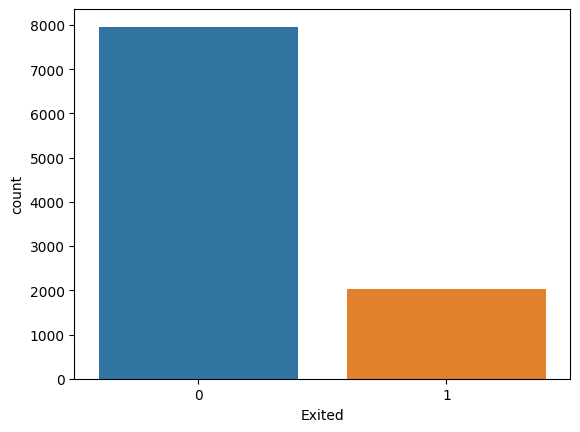

In [ ]:
sns.countplot(x=df_bank["Exited"])

In [ ]:
#Showing the values'count of the IsActiveMember feature
df_bank.IsActiveMember.value_counts()

# there is no class imbalance

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
#Showing the values'count of the HasCrCard feature
df_bank.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


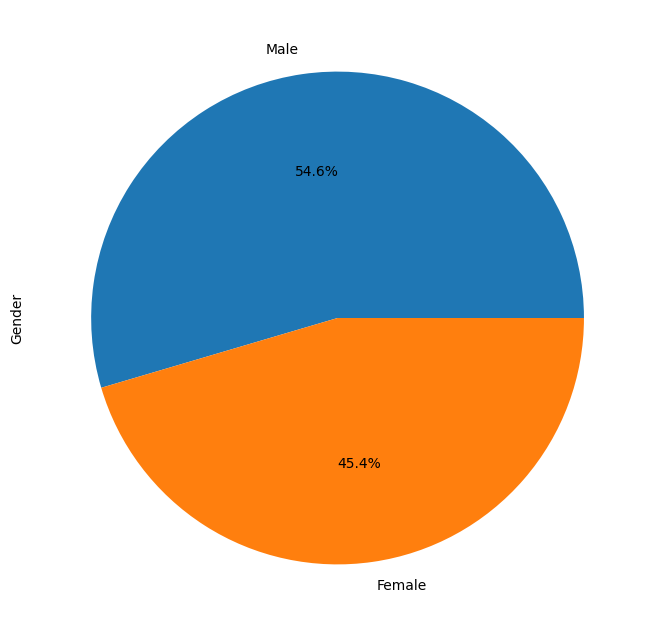

In [ ]:
#Showing the values'count of the HasCrCard feature
print(df_bank.Gender.value_counts())
df_bank["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.ylabel("Gender");

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


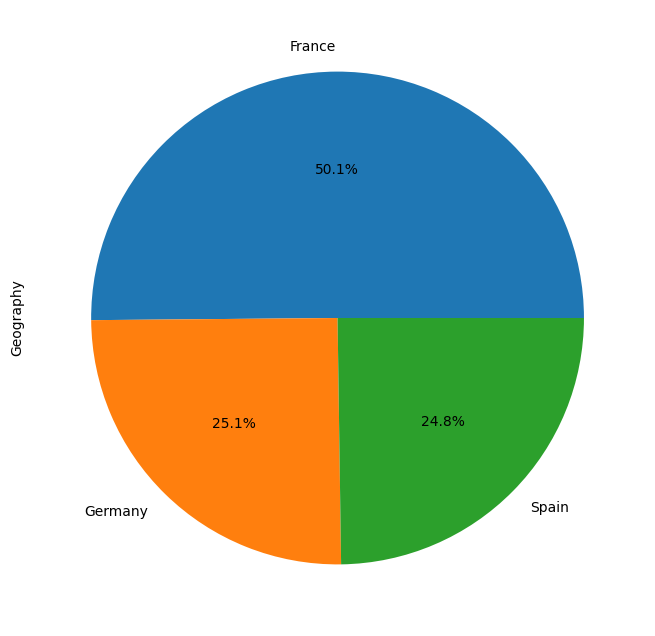

In [ ]:
#Showing the values'count of the HasCrCard feature
print(df_bank.Geography.value_counts())
df_bank["Geography"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.ylabel("Geography");

Check NULL values

In [ ]:
df_bank.isnull().sum().any()
# there are not any null values

False

Ckeck DUPLICATES

In [ ]:
df_bank.duplicated().sum()
# No duplicates

0

DROP Unimporatnt features

In [52]:
drop_list = [
   "RowNumber",
   "CustomerId",
   "Surname"]

df_bank.drop(columns=drop_list, inplace=True)
# I droped "RowNumber", "CustomerId", "Surname" Since it is unique information for the bank's customers ,
# it will cause leakage.

KeyError: ignored

In [53]:
#The shape of the dataset after dropping the features
df_bank.shape

(10000, 11)

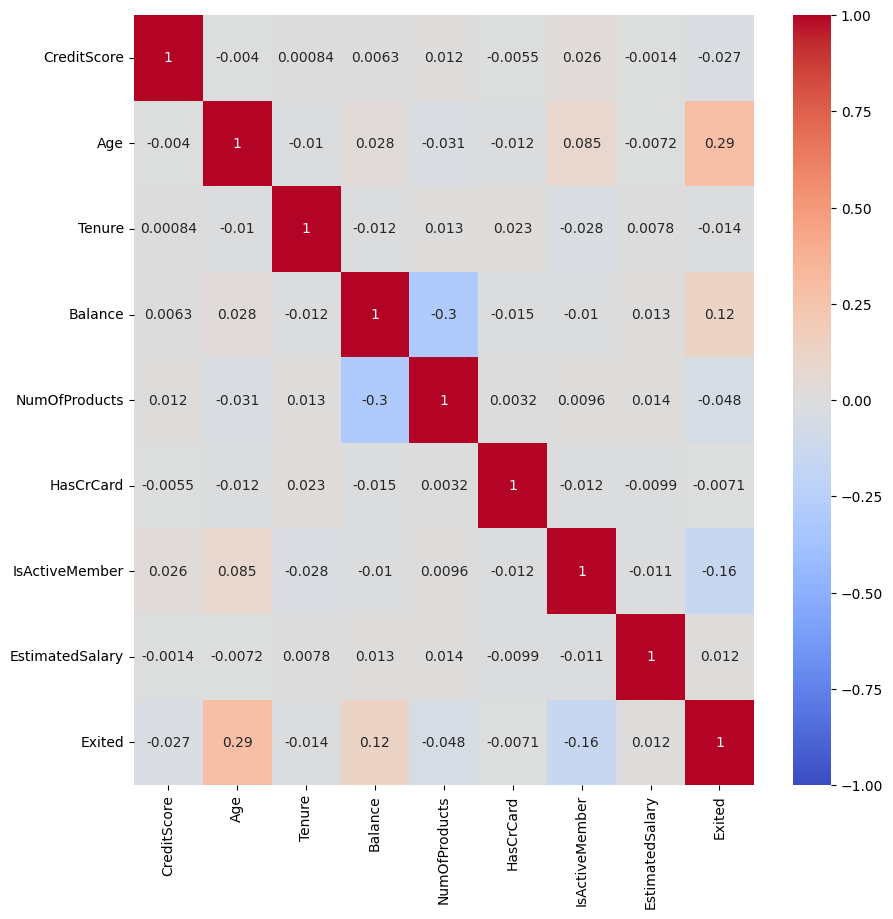

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

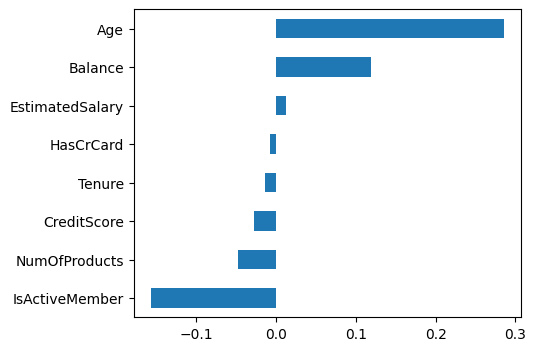

In [ ]:
plt.figure(figsize=(5, 4))
df_bank.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()
# IsActiveMember feateur is has high negative impact on the outcome
# Also Age feateur is has high positive impact on the outcome
# While EstimatedSalary ,HasCrCard and Tenure Has low impact on the outcome

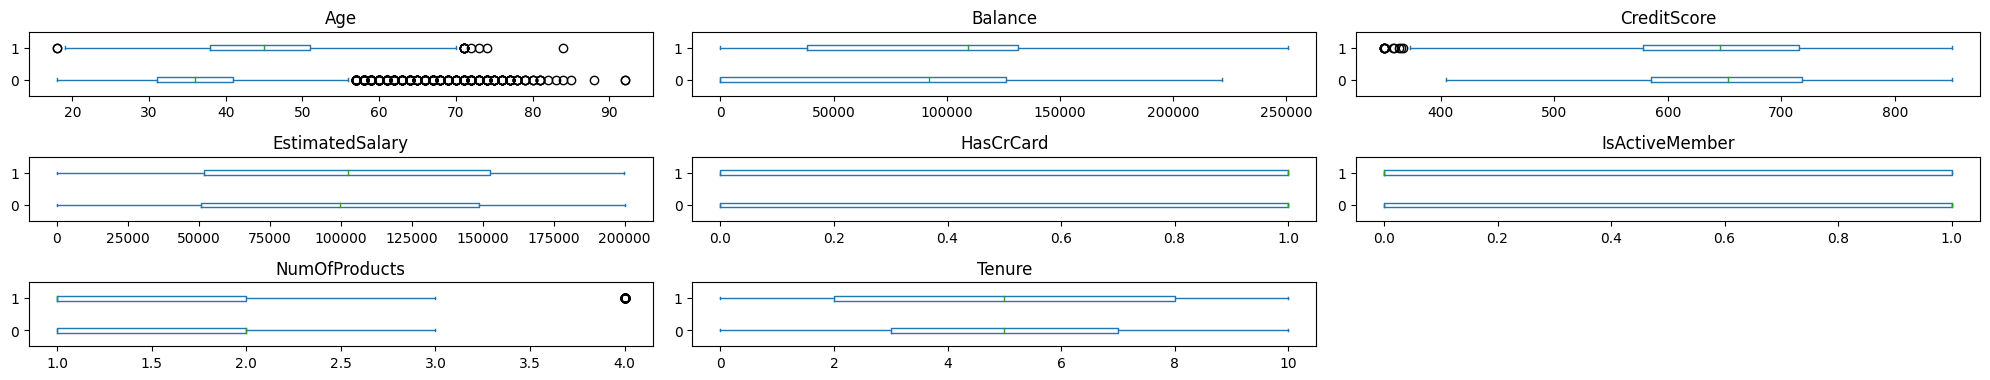

In [ ]:
df_bank.plot(by ='Exited', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();
# We confirmed that what we found out in basic statistics of dataframe
# We don't have many outliers in the data to effect the standart deviation
# Since mean and standard deviation are not very close to each other.
# Another important point to note is that we need to look at outliers in terms of target classes.
# For example, for the age feature black class has no outliers.

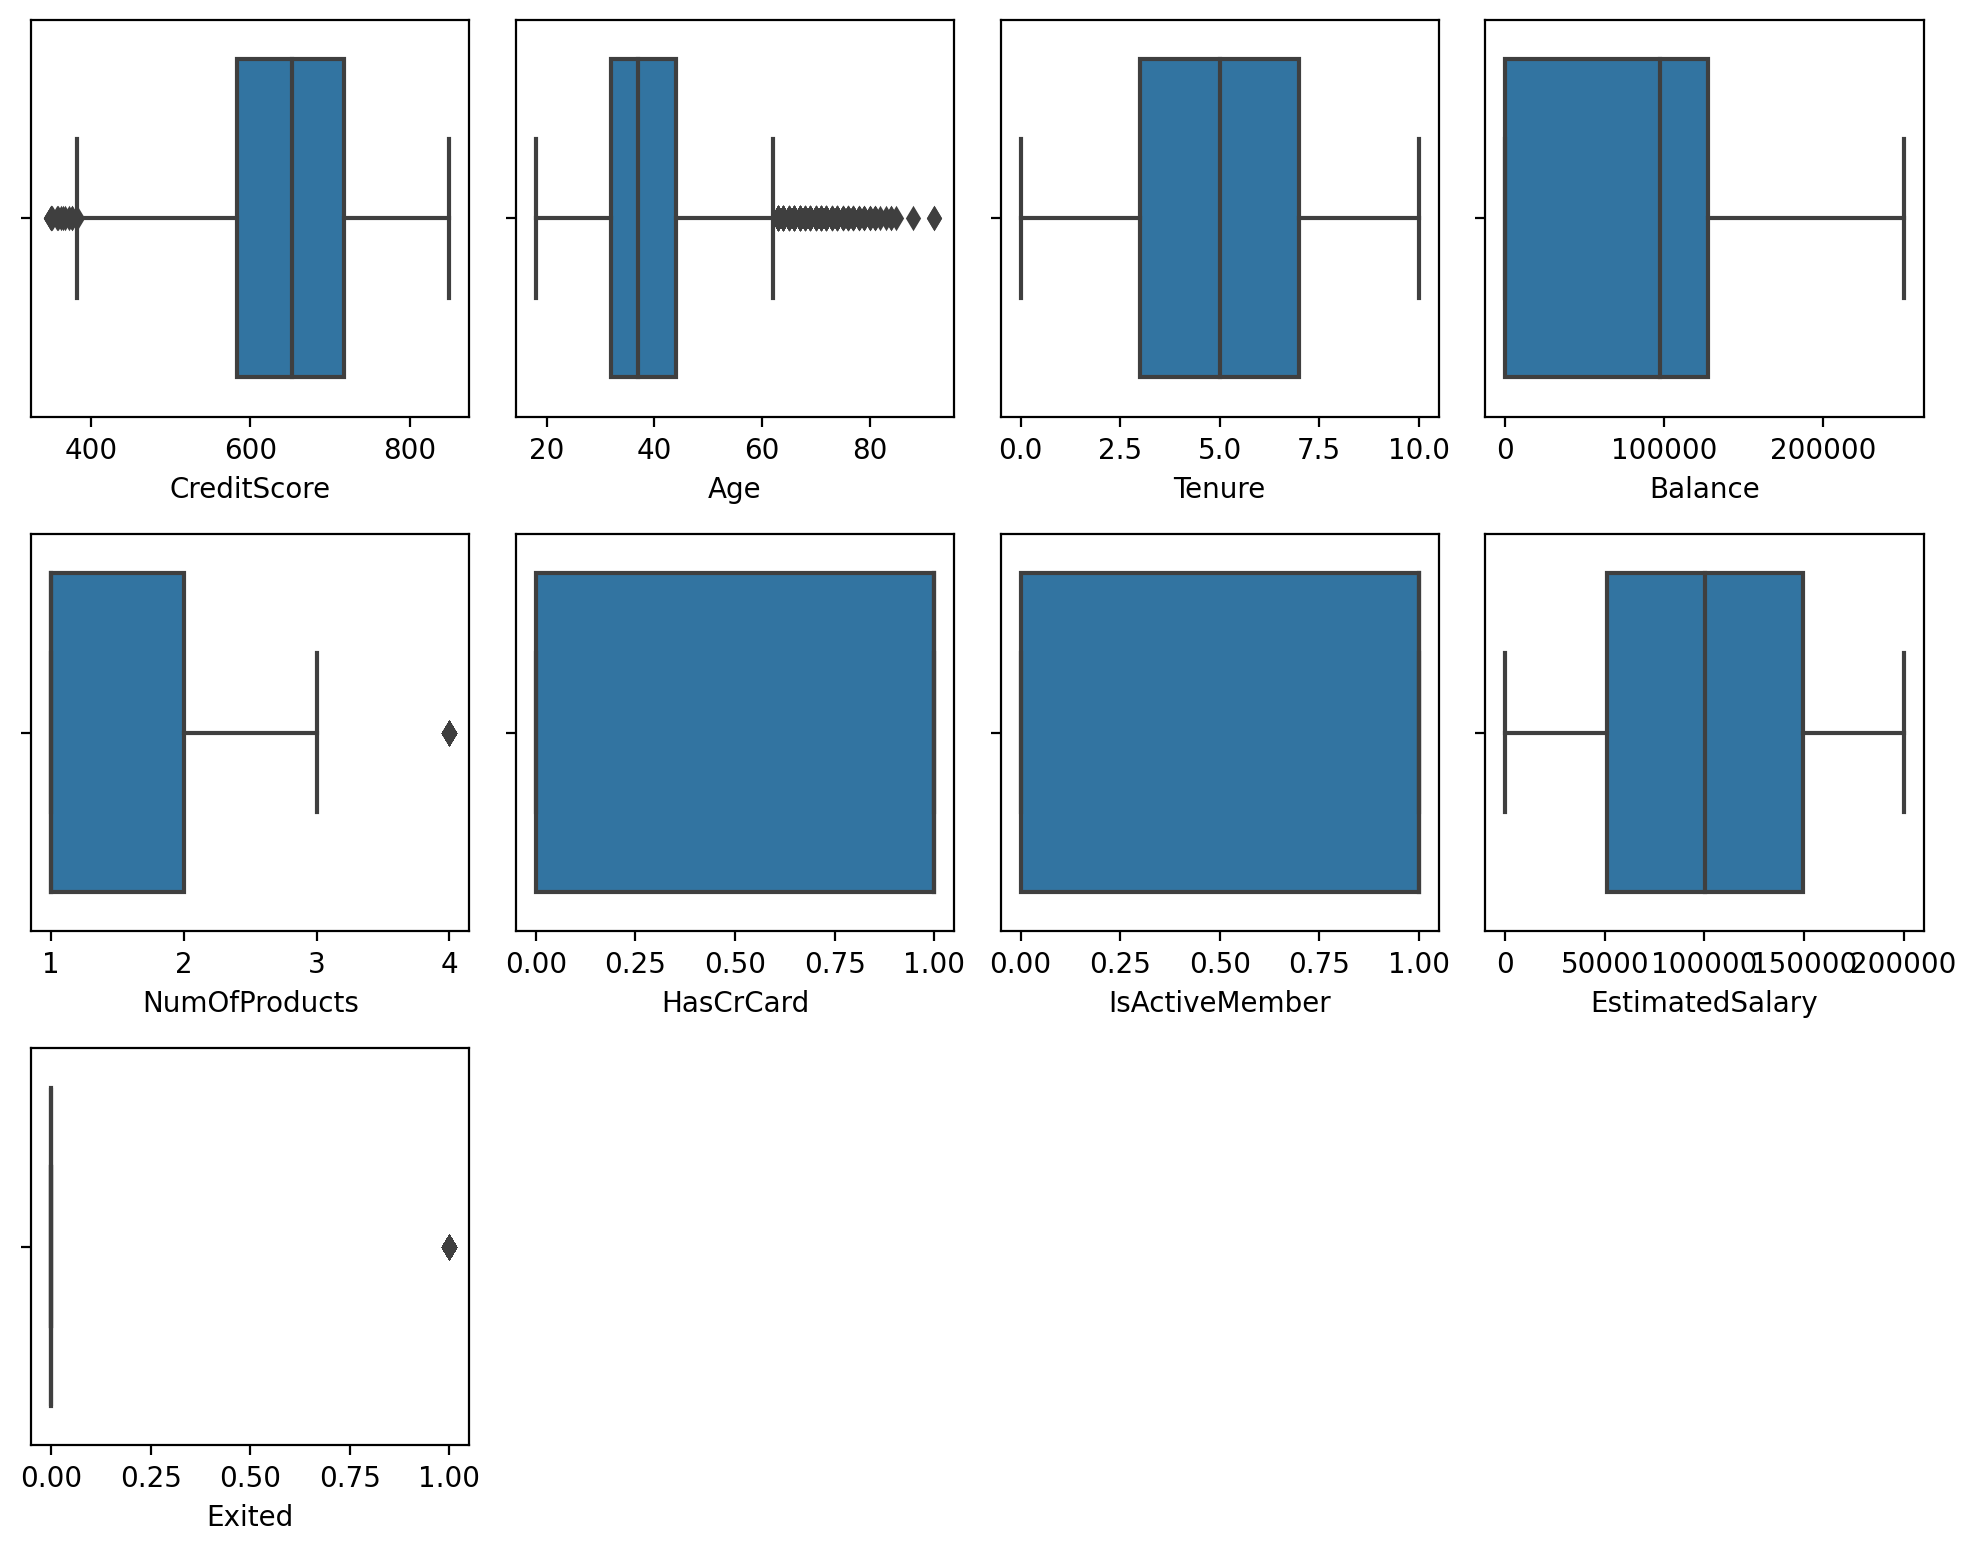

In [ ]:
fig = plt.figure(figsize=(10,10),dpi=200)

for i, col in enumerate(df_bank.select_dtypes(["float", "int"]).columns):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x=df_bank[col])

plt.tight_layout();


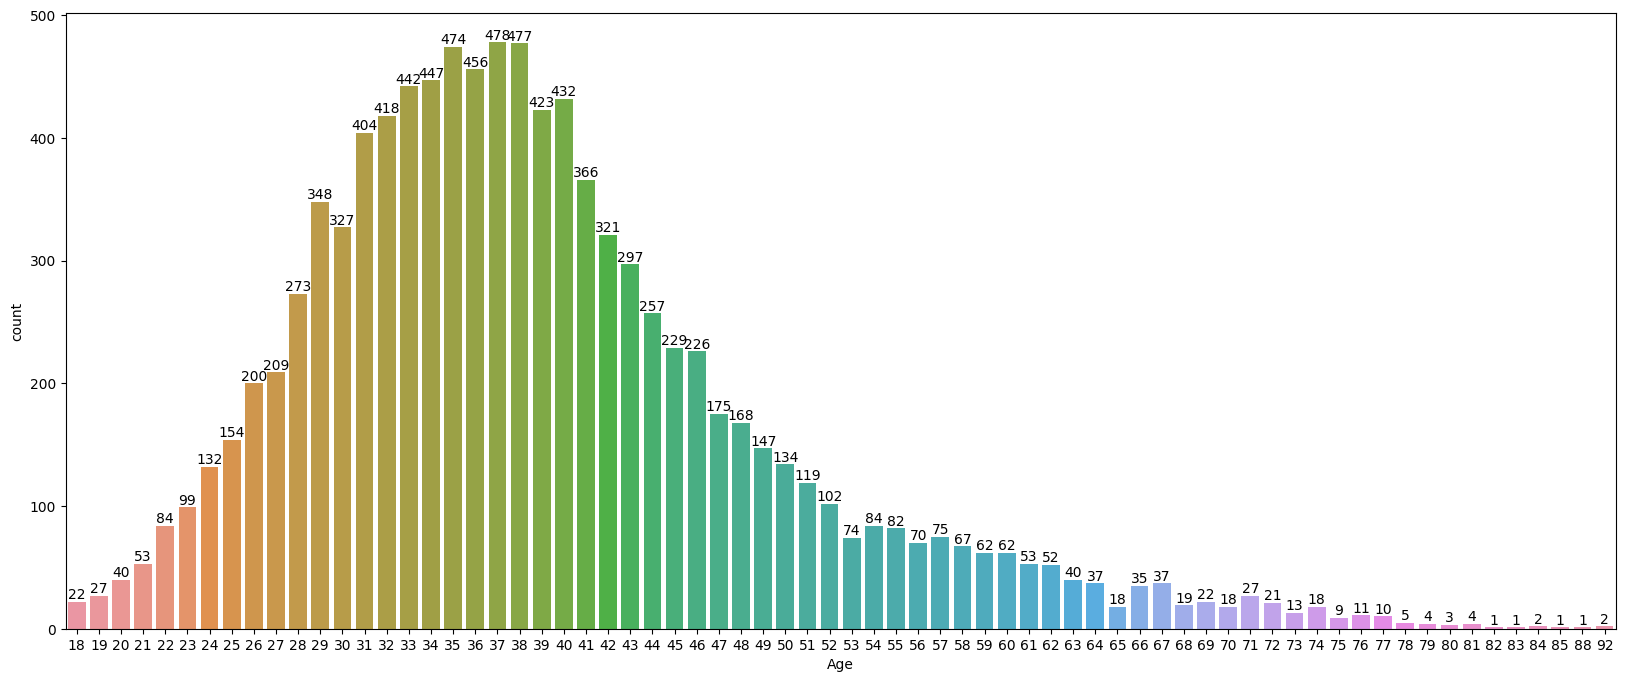

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Age", data = df_bank)
for p in ax.containers:
    ax.bar_label(p)
#There is a long tail on the right hand side
# Right skewed
#May need to be group the last 15 values on one value above 75
#it's not considered  outliers
#but I could not group them together or make a bins because it's numerical

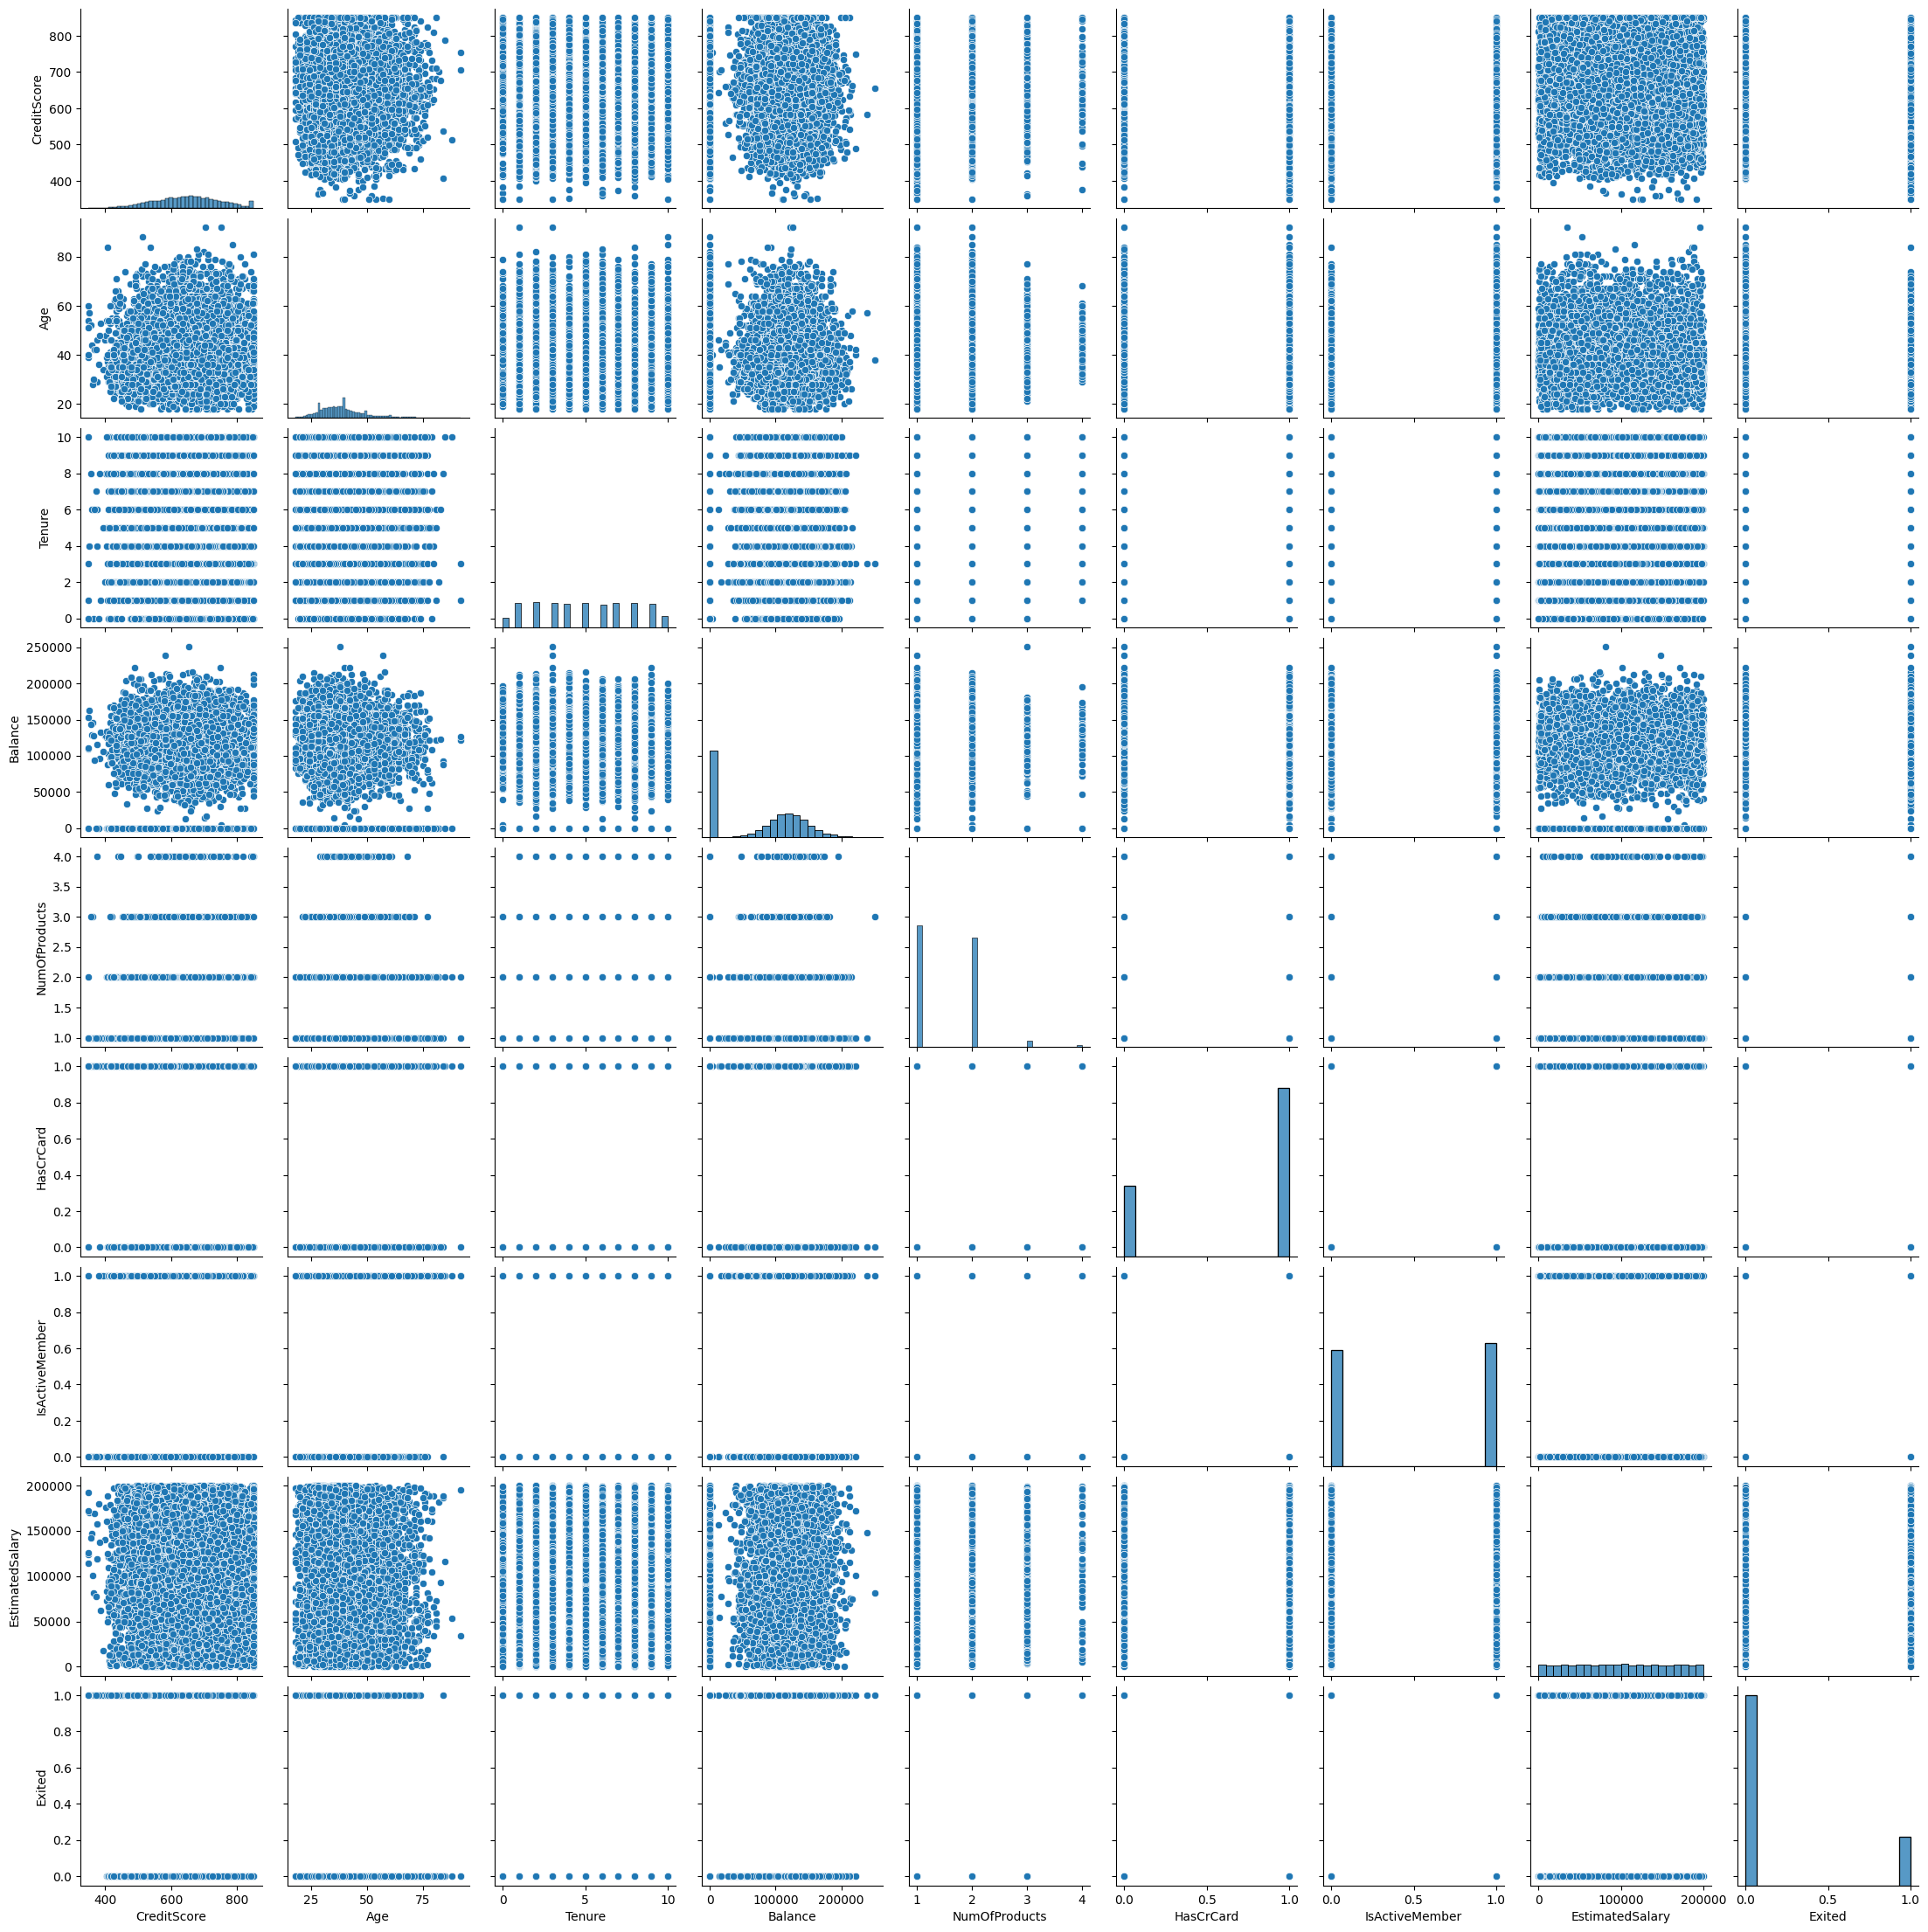

In [ ]:
sns.pairplot(df_bank)
plt.show()

In [ ]:
df_bank.select_dtypes("object").head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


# Preprocessing of Data
- Train | Test Split, Scalling

In [96]:
#X|Y split
X = df_bank.drop('Exited',axis=1) # Independet variables
y = df_bank['Exited'] # dependent variable (Target variable)

In [97]:
#Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

In [98]:
# Validation split from Train data
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [ ]:
seed =42

In [99]:
df_bank.shape

(10000, 11)

In [100]:
X_train.shape

(8100, 10)

In [76]:
y_train.shape

(8100,)

In [112]:
X_test.shape

(1000, 10)

In [113]:
y_test.shape

(1000,)

In [78]:
X_val.shape

(900, 10)

Column Transformer(ONE HOT Encoder & Min Max Scaler)

In [129]:
#make a column transformer for the different preprocessing steps
Column_Transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), ["Geography","Gender"]),
                                       remainder=MinMaxScaler(), verbose_feature_names_out=False,)

In [130]:
X_train_sc = Column_Transform.fit_transform(X_train);
X_val_sc = Column_Transform.transform(X_val)
X_test_sc = Column_Transform.transform(X_test)

In [126]:
X_test.shape

(1000, 10)

OVERSAMPLING using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

Oversampling = SMOTE(sampling_strategy='minority',random_state =42)#Oversampling only the minority class


In [45]:
X_train_over, y_train_over = Oversampling.fit_resample(X_train_sc,y_train)

In [ ]:
y_train_over.value_counts()

1    5733
0    5733
Name: Exited, dtype: int64

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim= X_train_over.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                504       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.486787,0.795139,0.464420,0.79625
1,0.456403,0.799306,0.434638,0.82125
2,0.429708,0.810417,0.402516,0.83375
3,0.406071,0.816250,0.378769,0.84250
4,0.390621,0.829167,0.370804,0.85250


In [32]:
model.fit( X_train_over, y_train_over, validation_data=(X_val_sc,y_val), batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
359/359 [==============================] - 4s 6ms/step - loss: 0.6320 - accuracy: 0.6477 - val_loss: 0.5609 - val_accuracy: 0.7163
Epoch 2/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.5666 - accuracy: 0.7125 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 3/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.5291 - accuracy: 0.7432 - val_loss: 0.4612 - val_accuracy: 0.8012
Epoch 4/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.5021 - accuracy: 0.7589 - val_loss: 0.4366 - val_accuracy: 0.8062
Epoch 5/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.4810 - accuracy: 0.7693 - val_loss: 0.5015 - val_accuracy: 0.7500
Epoch 6/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.4680 - accuracy: 0.7780 - val_loss: 0.4879 - val_accuracy: 0.7575
Epoch 7/1000
359/359 [==============================] - 2s 4ms/step - loss: 0.4566 - accuracy: 0.7863 - val_loss: 0.4196 - val_accuracy:

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.631960,0.647741,0.560884,0.71625
1,0.566556,0.712454,0.497898,0.77000
2,0.529104,0.743241,0.461198,0.80125
3,0.502109,0.758939,0.436630,0.80625
4,0.481009,0.769318,0.501475,0.75000


In [38]:
model.evaluate(X_val_sc,y_val , verbose=0)

[0.762328028678894, 0.7925000190734863]

In [142]:
loss, accuracy = model.evaluate(X_test_sc,y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5377472639083862
accuracy:  0.7450000047683716


In [109]:
X_test_sc.shape

(1000, 13)

In [110]:
y_test.shape

(1000,)

In [132]:
y_pred.shape

(1000, 1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

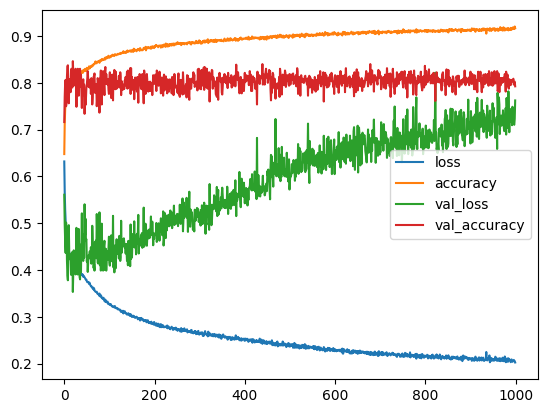

In [34]:
loss_df.plot()
plt.show()
# we need early stopping
# As shown in below graph the val-accuracy starts to fluctuate and  deviate from the accuracy
# same as val-loss starts to fluctuate and then deviate from the loss
# It's claerly we are over training the model to over fit the training data

In [143]:
y_pred = model.predict(X_test_sc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step


ValueError: ignored

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [136]:
import sklearn
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes =np.unique(df_bank['Exited']),
                                                 y=df_bank['Exited'])
class_weight = dict(enumerate(class_weight))

In [137]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim= X_train_over.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [138]:
model.fit( X_train_sc, y_train, validation_data=(X_val_sc,y_val), batch_size=64, epochs=200, verbose=1, class_weight =class_weight )

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.6569 - accuracy: 0.6842 - val_loss: 0.5747 - val_accuracy: 0.7178
Epoch 2/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6047 - accuracy: 0.6688 - val_loss: 0.5717 - val_accuracy: 0.7178
Epoch 3/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5804 - accuracy: 0.6988 - val_loss: 0.5496 - val_accuracy: 0.7356
Epoch 4/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5706 - accuracy: 0.7056 - val_loss: 0.5715 - val_accuracy: 0.7167
Epoch 5/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5574 - accuracy: 0.7183 - val_loss: 0.5268 - val_accuracy: 0.7589
Epoch 6/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5438 - accuracy: 0.7333 - val_loss: 0.5420 - val_accuracy: 0.7400
Epoch 7/200
127/127 [==============================] - 1s 6ms/step - loss: 0.5292 - accuracy: 0.7394 - val_loss: 0.5097 - val_accuracy: 0.7578

In [139]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.656865,0.684198,0.574669,0.717778
1,0.604747,0.668765,0.571723,0.717778
2,0.580424,0.698765,0.549573,0.735556
3,0.570560,0.705556,0.571479,0.716667
4,0.557399,0.718272,0.526759,0.758889


In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 36)                504       
                                                                 
 dense_11 (Dense)            (None, 18)                666       
                                                                 
 dense_12 (Dense)            (None, 9)                 171       
                                                                 
 dense_13 (Dense)            (None, 9)                 90        
                                                                 
 dense_14 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

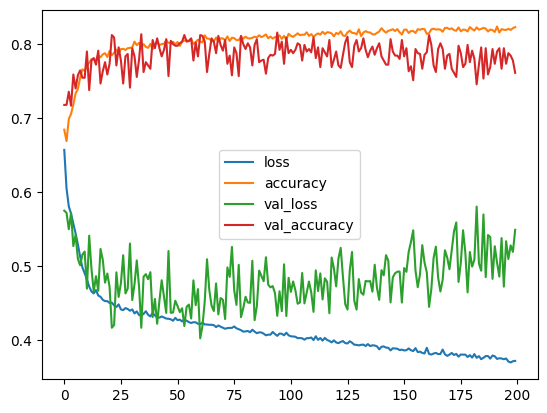

In [141]:
loss_df.plot()
plt.show()
#it's still fluctuate but it's very better than the model with overfitting

In [144]:
loss, accuracy = model.evaluate(X_test_sc,y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5377472639083862
accuracy:  0.7450000047683716


In [145]:
y_pred = model.predict(X_test_sc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Itry to fix this is error
#but i don't no the source of it

32/32 [==============================] - 0s 2ms/step


ValueError: ignored

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [152]:
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim= X_train_over.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.009)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy","recall"])

In [154]:
model.fit( X_train_sc, y_train, validation_data=(X_val_sc,y_val), batch_size=64, epochs=200, verbose=1, class_weight =class_weight )

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.6788 - accuracy: 0.4622 - val_loss: 0.6988 - val_accuracy: 0.6489
Epoch 2/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6404 - accuracy: 0.6568 - val_loss: 0.6451 - val_accuracy: 0.6778
Epoch 3/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5990 - accuracy: 0.6940 - val_loss: 0.5835 - val_accuracy: 0.7044
Epoch 4/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5787 - accuracy: 0.7032 - val_loss: 0.5785 - val_accuracy: 0.7244
Epoch 5/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5628 - accuracy: 0.7198 - val_loss: 0.5541 - val_accuracy: 0.7356
Epoch 6/200
127/127 [==============================] - 1s 7ms/step - loss: 0.5409 - accuracy: 0.7395 - val_loss: 0.5436 - val_accuracy: 0.7489
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5149 - accuracy: 0.7593 - val_loss: 0.5094 - val_accuracy: 0.7711

In [155]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.678782,0.462222,0.698839,0.648889
1,0.640388,0.656790,0.645106,0.677778
2,0.598988,0.693951,0.583478,0.704444
3,0.578696,0.703210,0.578521,0.724444
4,0.562751,0.719753,0.554148,0.735556


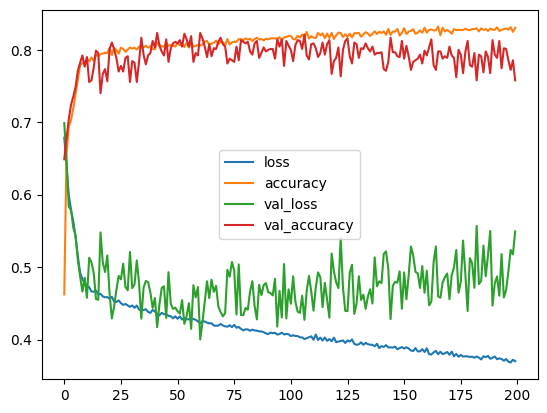

In [156]:
loss_df.plot()
plt.show()

In [157]:
y_pred = model.predict(X_test_sc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step


ValueError: ignored

### Add Dropout Layer

In [159]:
from tensorflow.keras.layers import Dropout

In [160]:
tf.random.set_seed(seed)

modeld = Sequential()

modeld.add(Dense(36, activation="relu", input_dim= X_train.shape[1]))
modeld.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.009)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy","recall"])

In [163]:
model.fit( X_train_sc, y_train, validation_data=(X_val_sc,y_val), batch_size=64, epochs=200, verbose=1, class_weight =class_weight )

Epoch 1/200
127/127 [==============================] - 1s 7ms/step - loss: 0.3734 - accuracy: 0.8252 - val_loss: 0.4520 - val_accuracy: 0.8022
Epoch 2/200
127/127 [==============================] - 1s 9ms/step - loss: 0.3686 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.7967
Epoch 3/200
127/127 [==============================] - 1s 10ms/step - loss: 0.3686 - accuracy: 0.8316 - val_loss: 0.4543 - val_accuracy: 0.8122
Epoch 4/200
127/127 [==============================] - 1s 10ms/step - loss: 0.3720 - accuracy: 0.8319 - val_loss: 0.5129 - val_accuracy: 0.7800
Epoch 5/200
127/127 [==============================] - 1s 10ms/step - loss: 0.3695 - accuracy: 0.8307 - val_loss: 0.4811 - val_accuracy: 0.7944
Epoch 6/200
127/127 [==============================] - 1s 10ms/step - loss: 0.3670 - accuracy: 0.8325 - val_loss: 0.5223 - val_accuracy: 0.7733
Epoch 7/200
127/127 [==============================] - 1s 10ms/step - loss: 0.3672 - accuracy: 0.8330 - val_loss: 0.5081 - val_accuracy: 0

In [164]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.373376,0.825185,0.452011,0.802222
1,0.368573,0.833333,0.465552,0.796667
2,0.368552,0.831605,0.454253,0.812222
3,0.371951,0.831852,0.512858,0.780000
4,0.369487,0.830741,0.481108,0.794444


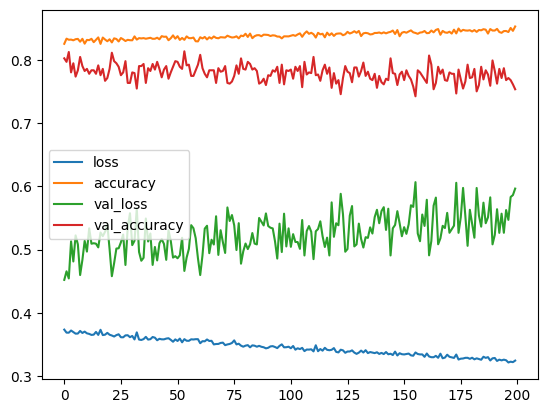

In [ ]:
loss_df.plot()
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [180]:

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim= X_train_over.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [181]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [182]:
model.fit(
    X_train_sc,
    y_train,
    validation_data=(X_val_sc,y_val),
    batch_size=64,
    epochs=200,
    verbose=1,
    class_weight = class_weight,
    callbacks= early_stop )

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.6739 - accuracy: 0.7156 - val_loss: 0.5997 - val_accuracy: 0.6722
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6290 - accuracy: 0.6430 - val_loss: 0.6152 - val_accuracy: 0.6533
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5927 - accuracy: 0.6859 - val_loss: 0.5442 - val_accuracy: 0.7289
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5632 - accuracy: 0.7184 - val_loss: 0.5509 - val_accuracy: 0.7300
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5346 - accuracy: 0.7396 - val_loss: 0.4925 - val_accuracy: 0.7789
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.5141 - accuracy: 0.7532 - val_loss: 0.5427 - val_accuracy: 0.7467
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4981 - accuracy: 0.7610 - val_loss: 0.4783 - val_accuracy: 0.7833

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.673853,0.715556,0.599656,0.672222
1,0.629035,0.642963,0.615218,0.653333
2,0.592714,0.685926,0.544206,0.728889
3,0.563208,0.718395,0.550945,0.730000
4,0.534554,0.739630,0.492522,0.778889


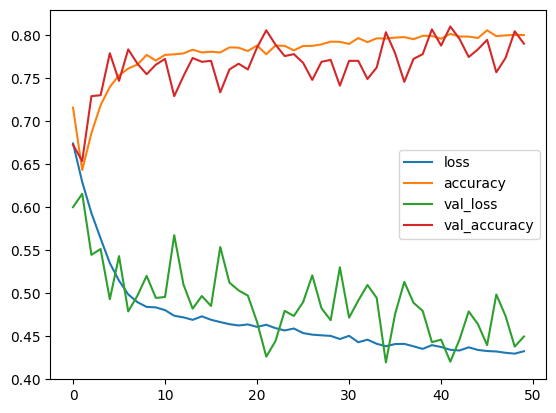

In [185]:
loss_df.plot()
plt.show()
# with early stopping even if it's still fluctuate but there is no much deviation

In [186]:
loss, accuracy = model.evaluate(X_test_sc,y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.40382054448127747
accuracy:  0.8230000138282776


#### Monitor the "val_recall" as metric

## Optuna

In [189]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.0 MB/s eta 0:00:00


In [190]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [193]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_test_sc.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train_sc,
        y_train,
        validation_data=(X_val_sc, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test_sc, y_test, verbose=0)[1]
    return score

In [194]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 20:34:23,226] A new study created in memory with name: no-name-366ee54c-e933-46c7-b575-e36ef029cd02
<ipython-input-193-85bc2d5f9b19>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
<ipython-input-193-85bc2d5f9b19>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w0 = trial.suggest_loguniform("w0", 0.01, 5)
<ipython-input-193-85bc2d5f9b19>:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w1 = trial.suggest_loguniform("w1", 0

Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 20:36:24,535] Trial 2 finished with value: 0.8510000109672546 and parameters: {'n_units1': 100, 'n_units2': 91, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0022682200119144287, 'w0': 0.01682462389094925, 'w1': 0.017170242237854492}. Best is trial 2 with value: 0.8510000109672546.


Restoring model weights from the end of the best epoch: 54.
Epoch 69: early stopping


[I 2023-10-30 20:36:58,679] Trial 3 finished with value: 0.4259999990463257 and parameters: {'n_units1': 125, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00021155844160869014, 'w0': 0.04072243853483863, 'w1': 1.5005048235499414}. Best is trial 2 with value: 0.8510000109672546.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 20:37:16,225] Trial 4 finished with value: 0.8569999933242798 and parameters: {'n_units1': 73, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007182998677244538, 'w0': 0.268745565592889, 'w1': 0.08014335492149335}. Best is trial 4 with value: 0.8569999933242798.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 20:37:35,558] Trial 5 finished with value: 0.828000009059906 and parameters: {'n_units1': 108, 'n_units2': 82, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00241697676204554, 'w0': 0.027949242399087026, 'w1': 0.09752384042236596}. Best is trial 4 with value: 0.8569999933242798.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 20:37:46,595] Trial 6 finished with value: 0.45100000500679016 and parameters: {'n_units1': 32, 'n_units2': 26, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00010735510073388168, 'w0': 0.030664557539025555, 'w1': 4.613648467634326}. Best is trial 4 with value: 0.8569999933242798.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 20:37:56,840] Trial 7 finished with value: 0.7990000247955322 and parameters: {'n_units1': 25, 'n_units2': 57, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.761172738580218e-05, 'w0': 0.5964875094609973, 'w1': 3.563864073375615}. Best is trial 4 with value: 0.8569999933242798.
[I 2023-10-30 20:39:19,876] Trial 8 finished with value: 0.7979999780654907 and parameters: {'n_units1': 45, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.6570729957210675e-05, 'w0': 0.04517135306554209, 'w1': 0.04427378978560728}. Best is trial 4 with value: 0.8569999933242798.


Restoring model weights from the end of the best epoch: 57.
Epoch 72: early stopping


[I 2023-10-30 20:39:54,856] Trial 9 finished with value: 0.8349999785423279 and parameters: {'n_units1': 9, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0008469525817966481, 'w0': 0.11991097023361662, 'w1': 0.3298968710531864}. Best is trial 4 with value: 0.8569999933242798.


{'n_units1': 73,
 'n_units2': 114,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.007182998677244538,
 'w0': 0.268745565592889,
 'w1': 0.08014335492149335}

In [196]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train_sc,
    y_train,
    validation_data=(X_val_sc, y_val),
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 0.5022 - recall: 0.0442 - val_loss: 0.4838 - val_recall: 0.0328
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4654 - recall: 0.0794 - val_loss: 0.4734 - val_recall: 0.0437
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4430 - recall: 0.1327 - val_loss: 0.4382 - val_recall: 0.1366
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4161 - recall: 0.2400 - val_loss: 0.4333 - val_recall: 0.3552
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3953 - recall: 0.3345 - val_loss: 0.4116 - val_recall: 0.3989
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3739 - recall: 0.3897 - val_loss: 0.3915 - val_recall: 0.2896
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3604 - recall: 0.4394 - val_loss: 0.4083 - val_recall: 0.2295
Epoch 8/100
16/16 [=====================

32/32 [==============================] - 0s 3ms/step


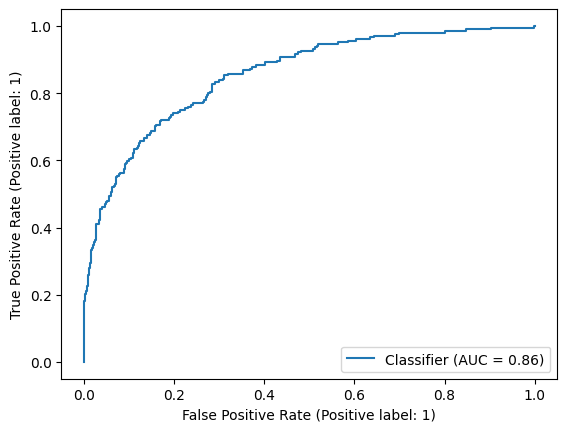

In [201]:
y_pred_proba = model.predict(X_test_sc)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [197]:
history = model.history.history

In [205]:
loss, accuracy = model.evaluate(X_test_sc,y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3537532687187195
accuracy:  0.4950980246067047


In [203]:
loss_df = pd.DataFrame(history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.502193,0.044242,0.483820,0.032787
1,0.465395,0.079394,0.473374,0.043716
2,0.442992,0.132727,0.438223,0.136612
3,0.416133,0.240000,0.433293,0.355191
4,0.395257,0.334545,0.411646,0.398907


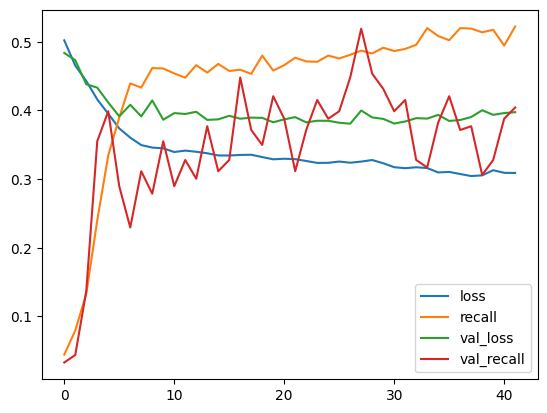

In [204]:
loss_df.plot()
plt.show()

In [199]:
y_pred = (model.predict(X_test_sc) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# the best model

32/32 [==============================] - 0s 2ms/step
[[749  47]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.68      0.50      0.57       204

    accuracy                           0.85      1000
   macro avg       0.78      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___